<a href="https://colab.research.google.com/github/Gecholus/Random-erase-Data-Augmentation/blob/main/Random_Errase_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

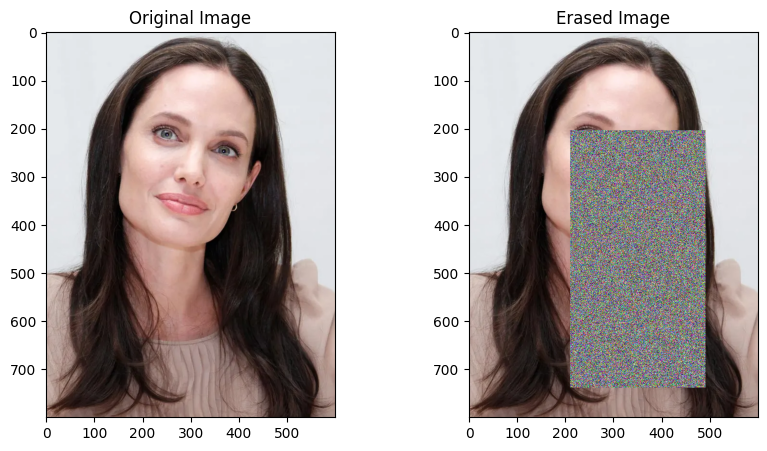

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import random

def random_erasing(image, p=1, sl=0.1, sh=0.4, r1=0, r2=3.3):
    if random.random() > p:
        return image

    height, width, _ = image.shape
    area = height * width

    while True:
        target_area = random.uniform(sl, sh) * area
        aspect_ratio = random.uniform(r1, r2)

        h = int(round(np.sqrt(target_area * aspect_ratio)))
        w = int(round(np.sqrt(target_area / aspect_ratio)))

        if w < width and h < height:
            x1 = random.randint(0, width - w)
            y1 = random.randint(0, height - h)
            image[y1:y1+h, x1:x1+w, :] = np.random.randint(0, 256, (h, w, 3))
            return image

# Load an example image
image = plt.imread("/content/angelina.webp")  # Replace this with your image path

# Apply random erasing
erased_image = random_erasing(image.copy())

# Display original and erased images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.subplot(1, 2, 2)
plt.imshow(erased_image)
plt.title("Erased Image")
plt.show()


